In [35]:
import numpy as np
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import callbacks
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from keras.models import load_model
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [36]:
df = pd.read_csv("./ACI-IoT-2023.csv")

In [37]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Connection Type
count,1231411,1231411,1.231411e+06,1231411,1.231411e+06,1.231411e+06,1231411,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.230402e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1.231411e+06,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1231411.0,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411,1231411
unique,865406,159381,NaN,89089,NaN,NaN,75403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2
top,8.6.0.1-8.0.6.4-0-0-0,192.168.1.45,NaN,192.168.1.1,NaN,NaN,2023-10-30 12:21:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port Scan,wireless
freq,3685,621729,NaN,255771,NaN,NaN,16208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441282,742758
mean,NaN,NaN,3.680030e+04,NaN,1.540297e+04,6.433792e+00,NaN,5.236489e+06,5.456022e+00,5.439780e+00,4.998453e+03,2.078230e+04,1.060881e+02,1.164441e+01,3.245995e+01,3.525900e+01,1.514058e+02,1.412901e+01,4.599782e+01,4.432950e+01,inf,inf,2.566652e+06,6.524624e+05,3.608930e+06,2.173028e+06,5.162231e+06,2.980284e+06,3.911888e+05,3.566219e+06,2.735757e+06,2.179595e+06,8.974230e+05,1.619241e+05,1.175485e+06,7.880951e+05,5.276873e-02,0.0,3.069649e-04,0.0,1.462479e+02,1.524636e+02,2.172460e+0

In [38]:
df.drop(["Flow Bytes/s","Timestamp","Flow Packets/s"],axis=1,inplace=True)

In [39]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Connection Type
0,192.168.1.7-54.230.163.60-33344-443-6,192.168.1.7,33344,54.230.163.60,443,6,379933,11,11,720.0,6169.0,517.0,0.0,65.454545,154.291519,2736.0,0.0,560.818182,904.459708,1.809205e+04,7.425997e+04,341860.0,1.0,376237.0,37623.7,106991.427191,341860.0,1.0,375202.0,37520.2,108963.958111,347222.0,204.0,0,0,0,0,360,360,28.952473,28.952473,0.0,2736.0,299.521739,669.529745,448270.079051,1,2,0,8,21,0,0,0,1.0,313.136364,65.454545,560.818182,0,0,0,6889,9,233993,0,32,0,280,29200,131,4,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
1,192.168.3.6-91.189.91.48-36754-80-6,192.168.3.6,36754,91.189.91.48,80,6,205637,3,3,87.0,189.0,87.0,0.0,29.000000,50.229473,189.0,0.0,63.000000,109.119201,4.112740e+04,7.851916e+04,181122.0,0.0,190862.0,95431.0,134959.814471,190862.0,0.0,195897.0,97948.5,138520.097114,195897.0,0.0,0,0,0,0,104,104,14.588814,14.588814,0.0,189.0,39.428571,73.493440,5401.285714,1,2,0,2,5,0,0,0,1.0,46.000000,29.000000,63.000000,0,0,0,0,0,0,0,14,0,31,29200,508,1,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
2,192.168.3.6-91.189.91.48-36754-80-6,192.168.3.6,36754,91.189.91.48,80,6,0,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,64,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,237,0,0,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
3,192.168.1.9-192.168.1.1-8080-40426-6,192.168.1.9,8080,192.168.1.1,40426,6,5030379,1,2,6.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,2.515190e+06,3.557015e+06,5030379.0,0.0,0.0,0.0,0.000000,0.0,0.0,5030379.0,5030379.0,0.000000,5030379.0,5030379.0,0,0,0,0,20,64,0.198792,0.397584,0.0,6.0,3.000000,3.464102,12.000000,1,0,0,0,3,0,0,0,2.0,4.000000,6.000000,0.000000,0,0,0,0,0,0,0,2,0,0,2048,123,0,20,0.0,0.0,0.0,0.0,8.494231e+14,1.201266e+15,1.698846e+15,5.030379e+06,Benign,wired
4,192.168.1.20-35.232.111.17-40054-80-6,192.168.1.20,40054,35.232.111.17,80,6,72278,3,4,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,37.000000,74.000000,1.204633e+04,1.672774e+04,35120.0,205.0,35109.0,17554.5,21349.675044,32651.0,2458.0,40239.0,13413.0,21473.154798,38190.0,205.0,0,0,0,0,104,136,41.506406,55.341874,0.0,148.0,29.375000,56.782637,3224.267857,1,2,0,2,6,0,0,0,1.0,33.571429,29.000000,37.000000,0,0,0,0,0,0,0,12,0,21,29200,508,1,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired


In [41]:
df.Label.value_counts()

Label
Port Scan             441282
Benign                329295
ICMP Flood            225234
Ping Sweep             71928
DNS Flood              46935
Vulnerability Scan     39537
OS Scan                37524
Slowloris              18643
SYN Flood              13857
Dictionary Attack       6380
UDP Flood                791
ARP Spoofing               5
Name: count, dtype: int64

In [42]:
features = df.columns.tolist()

In [43]:
features.remove("Label")

In [44]:
features.remove("Flow ID")
features.remove("Src IP")
features.remove("Dst IP")

In [149]:
X = df[features]
y= df["Label"]

In [150]:
X = pd.get_dummies(X, dtype=int)

In [151]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = pd.Series(y)

## Train Test Splits

In [156]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y,random_state=77)

In [108]:
# rfe = RFECV(estimator=clf, n_features_to_select=5) 

# rfe.fit(X_train, y_train)

# selected_features = X_train[:, rfe.support_]
# selected_feature_indices = [i for i, x in enumerate(rfe.support_) if x]

# print("Indices of selected features:", selected_feature_indices)
# print("Names of selected features:")
# for i in selected_feature_indices:
#     print(f"Feature {i+1}: {selected_features[:, i]}")


In [109]:
#index_lower = int(X_train.shape[0] * 0.3)
index_bigger = int(y_train.shape[0] * 0.7)

In [110]:
X_val = X_train.iloc[index_bigger:,]
X_train = X_train.iloc[:index_bigger,]

In [111]:
y_val = y_train.iloc[index_bigger:]
y_train = y_train.iloc[:index_bigger]

In [58]:
print(X_train.shape)
print(X_val.shape)

(689589, 79)
(295539, 79)


In [59]:
print(y_train.shape)
print(y_val.shape)

(689589,)
(295539,)


## Loading OOB Classifiers for Training

In [60]:
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf2 = xgb.XGBClassifier(random_state=42,class_weight='balanced')
clf3 = lgb.LGBMClassifier( random_state=42)

## Only Optimizing Random Forest as it gave the best Results over all the metrics when tested, Other OOB classifiers will be inlcuded in Ensemble.

In [204]:
param_dist = {
    'n_estimators': randint(50, 200),  
    'max_depth': randint(5, 50),       
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10), 
    'max_features': ['auto', 'sqrt', 'log2', None], }

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_

In [205]:
clf1= RandomForestClassifier({**best_rf},n_estimators=100, 
                             class_weight='balanced', random_state=42)

In [64]:
clf1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [65]:
clf2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
clf3.fit(X_train,y_train)

In [157]:
pred1 = clf1.predict(X_test)

In [158]:
pred2 = clf2.predict(X_test)

In [139]:
pred3 = clf3.predict(X_test)

### Code for Validating Models - Manual Testing : LGBM Gave bad results. Not Including in Ensemble

In [140]:
binary_preds = pred3

In [141]:
accuracy = accuracy_score(y_test, binary_preds)
precision = precision_score(y_test, binary_preds, average='macro')
recall = recall_score(y_test, binary_preds, average='micro')
f1 = f1_score(y_test, binary_preds, average='micro')
hamming_loss_val = hamming_loss(y_test, binary_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming loss:", hamming_loss_val)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5709529281355189
Precision: 0.3499467575584616
Recall: 0.5709529281355189
F1-score: 0.5709529281355189
Hamming loss: 0.4290470718644811


5CV F1 Results: 
- Random Forest Cross-Validation Mean F1 macro Score: 0.9398378081595483
- XGBoost Cross-Validation F1 macro Score: 0.9346650122150619
- LightGBM Cross-Validation F1 macro Score: 0.803

---

### Preciting From Build Deep Learning Model

In [159]:
X = df[features]
y= df["Label"]
X = pd.get_dummies(X, dtype=int)
y = pd.get_dummies(y,dtype=int)
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y, random_state = 77)

In [160]:
source_path = '/kaggle/input/iot-network-security-anomaly-classifier/keras/model_1/1/model.keras'
destination_path = '/kaggle/working/model.keras'
shutil.copyfile(source_path, destination_path)
loaded_model = load_model(destination_path)

In [161]:
y_preds =loaded_model.predict(X_test)

7697/7697 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [162]:
probabilities = y_preds

In [163]:
max_prob_indices = np.argmax(probabilities, axis=1)
binary_predictions = (np.arange(probabilities.shape[1]) == max_prob_indices[:, None]).astype(int)

In [164]:
binary_preds = pd.DataFrame(binary_predictions, columns = y_train.columns)
binary_preds_encoded= pd.from_dummies(binary_preds)
binary_preds = pd.DataFrame(binary_predictions, columns = ['ARP Spoofing', 'Benign', 'DNS Flood', 'Dictionary Attack',
       'ICMP Flood', 'OS Scan', 'Ping Sweep', 'Port Scan', 'SYN Flood',
       'Slowloris', 'UDP Flood', 'Vulnerability Scan'])

binary_preds_encoded= pd.from_dummies(binary_preds)

binary_preds_encoded.iloc[:,0] = binary_preds_encoded.iloc[:,0].map({
    'ARP Spoofing': 0,
    'Benign': 1,
    'DNS Flood': 2,
    'Dictionary Attack': 3,
    'ICMP Flood': 4,
    'OS Scan': 5,
    'Ping Sweep': 6,
    'Port Scan': 7,
    'SYN Flood': 8,
    'Slowloris': 9,
    'UDP Flood': 10,
    'Vulnerability Scan': 11
})

In [165]:
preds_dl = pd.Series(binary_preds_encoded.iloc[:,0].values)

# Ensembling predictions

In [166]:
predictions = [pred1.copy(), pred2.copy(), preds_dl.copy()]

In [167]:
for i, prediction in enumerate(predictions):
    print(f"Prediction {i+1} - Shape: {prediction.shape}, Content: {prediction}")

Prediction 1 - Shape: (246283,), Content: [6 7 1 ... 1 3 1]
Prediction 2 - Shape: (246283,), Content: [6 7 1 ... 1 3 1]
Prediction 3 - Shape: (246283,), Content: 0         4
1         1
2         4
3         1
4         1
         ..
246278    4
246279    6
246280    7
246281    1
246282    7
Length: 246283, dtype: object


In [168]:
predictions_array = [np.array(prediction, dtype=int) for prediction in predictions]

ensemble_prediction = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=np.array(predictions_array))


In [171]:
X = df[features]
y= df["Label"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = pd.Series(y)
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y,random_state=77)

In [172]:
binary_preds = ensemble_prediction
accuracy = accuracy_score(y_test, binary_preds)
precision = precision_score(y_test, binary_preds, average='macro')
recall = recall_score(y_test, binary_preds, average='micro')
f1 = f1_score(y_test, binary_preds, average='micro')
hamming_loss_val = hamming_loss(y_test, binary_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming loss:", hamming_loss_val)

Accuracy: 0.9994680915856962
Precision: 0.9158296480344577
Recall: 0.9994680915856962
F1-score: 0.9994680915856962
Hamming loss: 0.00053190841430387


In [173]:
report = classification_report(y_test, ensemble_prediction)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00     65859
           2       1.00      1.00      1.00      9387
           3       1.00      1.00      1.00      1276
           4       1.00      1.00      1.00     45047
           5       1.00      1.00      1.00      7505
           6       1.00      1.00      1.00     14386
           7       1.00      1.00      1.00     88257
           8       1.00      1.00      1.00      2771
           9       1.00      1.00      1.00      3729
          10       0.99      0.89      0.94       158
          11       1.00      1.00      1.00      7907

    accuracy                           1.00    246283
   macro avg       0.92      0.91      0.91    246283
weighted avg       1.00      1.00      1.00    246283



---

## How the Neural Network was Trained:

In [192]:
X = df[features]
y= df["Label"]
X = pd.get_dummies(X, dtype=int)
y = pd.get_dummies(y,dtype=int)
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y, random_state = 42)

In [193]:
X_val = X_train.iloc[index_bigger:,]
X_train = X_train.iloc[:index_bigger,]
y_val = y_train.iloc[index_bigger:]
y_train = y_train.iloc[:index_bigger]

In [198]:
num_classes = 12  

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=[79]),
    layers.BatchNormalization(),  
    layers.Dropout(0.5),  
    layers.Dense(units=32, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.5), 
    layers.Dense(units=16, activation='relu'),
    layers.BatchNormalization(),  
    layers.Dropout(0.5), 
    layers.Dense(units=num_classes, activation='softmax')  
])

In [199]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy'
)

In [200]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [203]:
%%time
history= model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=100,
    callbacks =[early_stopping],
    # put your callbacks in a list
    verbose=0 # turn off training log
)

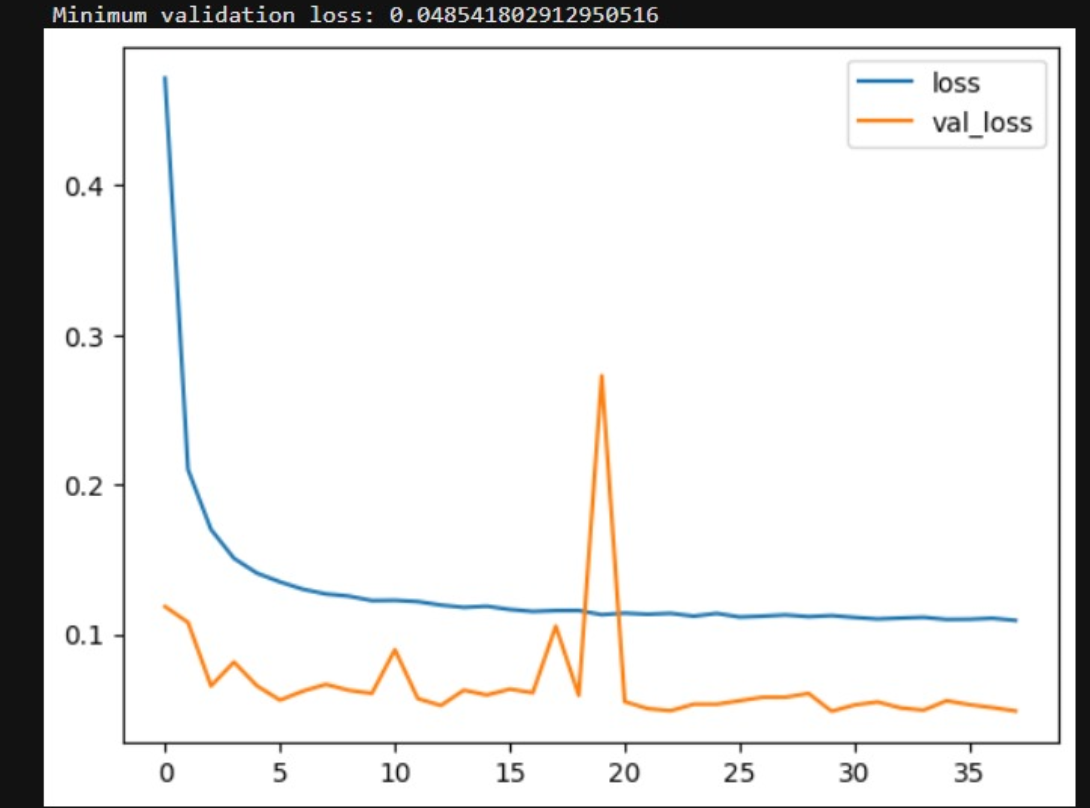

In [202]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [147]:
y_preds = model.predict(X_test)

7697/7697 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [148]:
y_preds.shape

(246283, 12)

In [149]:
threshold = 0.5
binary_preds = np.where(y_preds >= threshold, 1, 0)

accuracy = accuracy_score(y_test, binary_preds)
precision = precision_score(y_test, binary_preds, average='micro')
recall = recall_score(y_test, binary_preds, average='micro')
f1 = f1_score(y_test, binary_preds, average='micro')
hamming_loss_val = hamming_loss(y_test, binary_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming loss:", hamming_loss_val)


Accuracy: 0.9859917249668064
Precision: 0.9871300289838577
Recall: 0.9859917249668064
F1-score: 0.9865605486286316
Hamming loss: 0.0022386170922610708
